In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

pd.options.display.max_rows = 50
pd.options.display.max_columns = 20

In [2]:
#Loading Dataset and removing all unobserved columns
df_videos = pd.read_csv('movie_metadata.csv')
df_videos.drop(df_videos.columns.difference(['movie_title', 'genres', 'title_year', 'imdb_score', 'gross', 'budget', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews']), 1, inplace=True)

##Reordering column titles
column_titles = ['movie_title', 'genres', 'title_year', 'imdb_score', 'gross', 'budget', 'num_voted_users', 'num_user_for_reviews', 'num_critic_for_reviews']
df_videos = df_videos.reindex(columns=column_titles)

In [3]:
#Dropping all rows that contains null values
df_videos = df_videos.dropna(how='any')

#Dropping all entries before YouTube's established date of 2005
pd.to_numeric(df_videos.title_year)
df_videos = df_videos.drop(df_videos[df_videos.title_year < 2005].index)

print(df_videos)

                                       movie_title  \
0                                          Avatar    
1        Pirates of the Caribbean: At World's End    
2                                         Spectre    
3                           The Dark Knight Rises    
5                                     John Carter    
6                                    Spider-Man 3    
7                                         Tangled    
8                         Avengers: Age of Ultron    
9          Harry Potter and the Half-Blood Prince    
10             Batman v Superman: Dawn of Justice    
11                               Superman Returns    
12                              Quantum of Solace    
13     Pirates of the Caribbean: Dead Man's Chest    
14                                The Lone Ranger    
15                                   Man of Steel    
16       The Chronicles of Narnia: Prince Caspian    
17                                   The Avengers    
18    Pirates of the Caribbe

In [4]:
#Retrieving all genre

action = (sum(df_videos['genres'].str.contains('Action')))
western = (sum(df_videos['genres'].str.contains('Western')))
comedy = (sum(df_videos['genres'].str.contains('Comedy')))
horror = (sum(df_videos['genres'].str.contains('Horror')))

print(action)
print(western)
print(comedy)
print(horror)
##for entries in df_videos['genres']:
    ##x = entries.split("|")
    ##for genre_cat in x:


491
22
723
204


([<matplotlib.axis.XTick at 0x2a2e2b0bf28>,
 <a list of 7 Text xticklabel objects>)

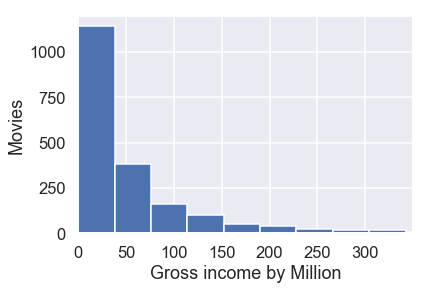

In [8]:
##df_videos.max()
##df_videos.min()

##Gross for each movie
df_videos['gross'] = (df_videos['gross'] / 1000000)
hist = df_videos['gross'].plot.hist(bins=20)
hist.set_ylabel("Movies")
hist.set_xlabel("Gross income by Million")
plt.xlim(0,350)
plt.xticks(np.arange(0, 350, 50)) 


([<matplotlib.axis.XTick at 0x2a2e2b1f2e8>,
 <a list of 6 Text xticklabel objects>)

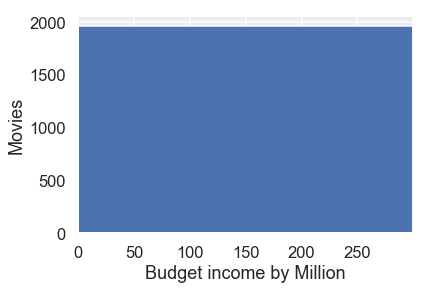

In [6]:
df_videos['budget'] = (df_videos['budget'] / 1000000)

budget = df_videos['budget'].plot.hist(bins=10)
budget.set_ylabel("Movies")
budget.set_xlabel("Budget income by Million")
plt.xlim(0,300)
plt.xticks(np.arange(0, 300, 50)) 
